# Assignment #5 - Deep Learning (Extra Credits)

### <font color="red"> DUE: Dec 6 (Friday) 11:00 pm </font>  

<font color="blue"> Abhilash Mandlekar</font>

# I. Overview

This deep learning assignment mainly focuses to build multi-layer neural network model. The three different deep learning models are created with differing number of hidden layers in each model. I am using the same KDD Cup dataset that I used in previous assignments. The dataset is of "Rain in Australia" which is taken from kaggle. The dataset has total 23 features and has over 1 lakh rows which is used to predict whether there will be rain tomorrow or not.<br>

By changing the hidden layers in model we can compare the accuracies of these model and see the results. The best model is the model with high accuracy on training as well as on testing set.


# II. Data

### Reading the data

Since the data is in csv file, I have used pandas function read_csv to read the csv file for the dataset. This creates the dataframe which can directly be treated as the table and maintains the data in structured format. Here I have created a class that can be used to read the dataset for rain.

In [62]:
import pandas as pd
import seaborn as sb
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [74]:
class ReadWeatherData():
    def weatherData(self, fname):
        df = pd.read_csv(fname)
        df = df.dropna()
        return df

rwd = ReadWeatherData()
rain_df = rwd.weatherData("weatherAUS.csv")

In [75]:
rain_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2.346960
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,8.731885
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.600000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,367.600000


### Visualization of data

#### 1. Distribution plot (Windspeed distribution)

We can see that the windspeed is normally distributed between the range of 0-120 km/hr. As we can see from the graph below, the mean of windspeed in this dataset is around 38 km/hr.

Dataframe is matrix of:  (56420, 24)


Text(0.5, 0, 'Wind speed in km/hr')

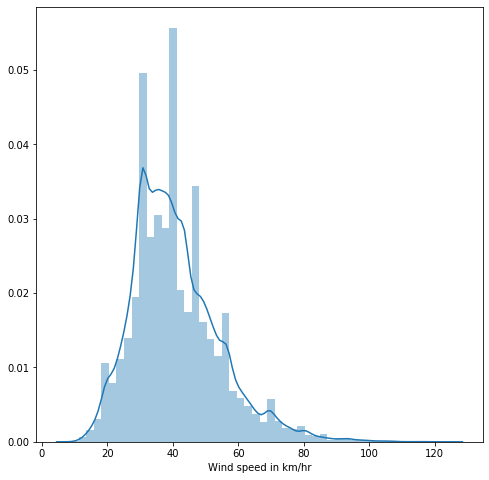

In [63]:
print("Dataframe is matrix of: ",rain_df.shape)
fig, ax = plt.subplots(figsize=(8,8))
sb.distplot(rain_df['WindGustSpeed'])
plt.xlabel("Wind speed in km/hr")

#### 2. Scatter plot ( Humidity % vs Rainfall in mm)

As the humidity percentage in air increases, it increases the rainfall. The same is shown in the scatter plot below.

We can clearly see that there are more datapoints plotted when the humidity in air is higher.

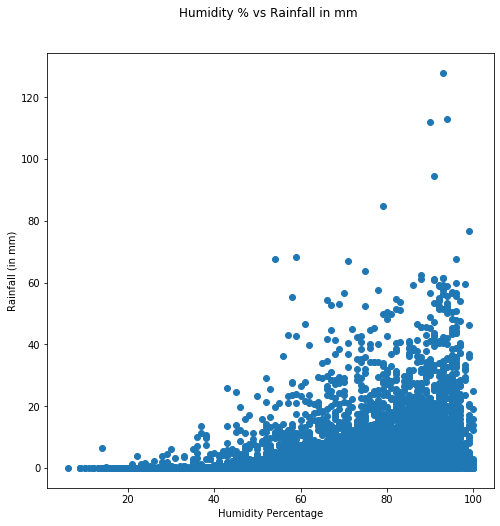

In [64]:
rain_df = rain_df[:15000]
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(rain_df['Humidity9am'], rain_df['Rainfall'])
plt.ylabel("Rainfall (in mm)")
plt.xlabel("Humidity Percentage")
plt.title("Humidity % vs Rainfall in mm \n\n")
plt.show()

#### 3. Bar graph (Cities in Australia vs Rainfall in mm)

The bar graph below, shows the cities with the respective rainfall in mm.

The highest rainfall is recorded in city "CoffsHarbour" with more than 120 mm rainfall followed by city "More" having 110 mm of rainfall.

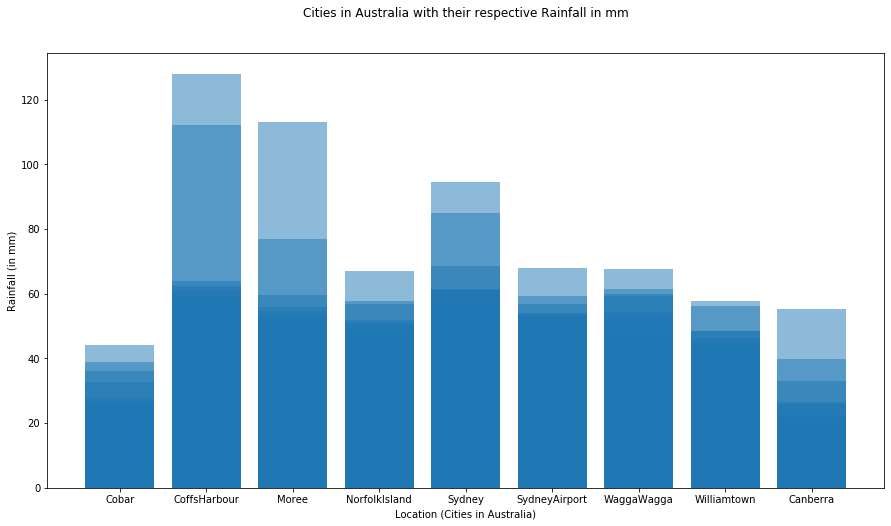

In [65]:
fig, ax = plt.subplots(figsize=(15,8))
plt.bar(rain_df['Location'], rain_df['Rainfall'], alpha=0.5)
plt.ylabel("Rainfall (in mm)")
plt.xlabel("Location (Cities in Australia)")
plt.title("Cities in Australia with their respective Rainfall in mm\n\n")
plt.show()

### Preliminary Observation

By looking at the above graphs we can make some general observations such as,<br>
1) the increase in humidity percentage in atmosphere increase the rainfall in mm (scatter plot 2)<br>
2) Rainfall Trends in Australia - we can clearly see the regions that has higher rainfall than in other regions. (Bar graph 3)<br>
3) The first distribution graph shows the wind speed in most of the dataset is near to 40 km/hr<br>

### Data Preprocessing

In [66]:
rwd = ReadWeatherData()
rain_df = rwd.weatherData("weatherAUS_class.csv")
rain_df_temp = rain_df.dropna()
df1_temp = rain_df_temp.iloc[:,2:7]
df2_temp = rain_df_temp.iloc[:,8]
df3_temp = rain_df_temp.iloc[:,11:21]
df1_temp = df1_temp.join(df2_temp)
df1_temp = df1_temp.join(df3_temp)
rain_df_x = df1_temp
rain_df_target = rain_df_temp.iloc[:,23:24]

In [67]:
rain_df_x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
5939,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
5940,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
5942,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
5943,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
5944,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6


In [68]:
rain_df_target.head()

,RainTomorrow
5939,No
5940,No
5942,No
5943,No
5944,No


In [69]:
rain_df_target.loc[rain_df_target['RainTomorrow'] == 'No', 'RainTomorrow'] = 0
rain_df_target.loc[rain_df_target['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1

In [70]:
X_train, X_test, y_train, y_test = train_test_split(rain_df_x, rain_df_target, test_size=0.2)

# III. Methods


<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />



### Fully connected neural networks

The model with fully connected neural network is built because the data is one-dimenesional. In such type of networks, output of one layer is given as an input to the next layer. Since each layer is connected with the previous layer, it is also called as Densely connected network.<br>

ReLu which is a non-linear action function is used here. Droupout is added to every model in order to control the data to overfit the model.


### Neural Network with  7 layers

In the first model, I am implementing seven hidden layers wth different number of hidden nodes [280,256,128,64,32,16,8] and using ReLU as the activation function and the results are observed.

W1206 17:38:35.910685  4712 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Training Accuracy 82.73% and Validation Accuracy 84.29%


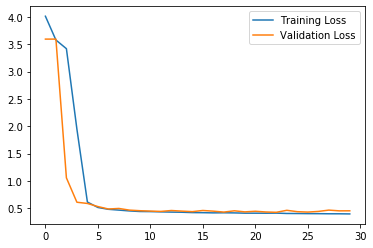

In [71]:
h_layer1 = 280
h_layer2 = 256
h_layer3 = 128
h_layer4 = 64
h_layer5 = 32
h_layer6 = 16
h_layer7 = 8
n_out = 2
input_layer = tf.keras.layers.Input(shape=(16,))
layer = tf.keras.layers.Dense(h_layer1, activation="relu")(input_layer)
layer = tf.keras.layers.Dense(h_layer2, activation="relu")(layer)
dropout=tf.keras.layers.Dropout(0.5)(layer)
layer = tf.keras.layers.Dense(h_layer3, activation="relu")(dropout)
dropout=tf.keras.layers.Dropout(0.5)(layer)
layer = tf.keras.layers.Dense(h_layer4, activation="relu")(dropout)
dropout=tf.keras.layers.Dropout(0.3)(layer)
layer = tf.keras.layers.Dense(h_layer5, activation="relu")(dropout)
dropout=tf.keras.layers.Dropout(0.5)(layer)
layer = tf.keras.layers.Dense(h_layer6, activation="relu")(dropout)
layer = tf.keras.layers.Dense(h_layer7, activation="relu")(layer)
output = tf.keras.layers.Dense(n_out, activation="softmax")(layer)
model_l2 = tf.keras.models.Model(input_layer, output)

optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model_l2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
hist=model_l2.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test), verbose=0)
print("Training Accuracy %.2f%% and Validation Accuracy %.2f%%"%(hist.history['accuracy'][-1]*100, hist.history['val_accuracy'][-1]*100))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(["Training Loss", "Validation Loss"])

### Neural Network with  8 layers

In eight layered model, the hidden nodes are:  [110,100,80,50,40,25,15,3] with the same activation function.

W1206 17:41:33.843957  4712 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Training Accuracy 84.50% and Validation Accuracy 83.44%


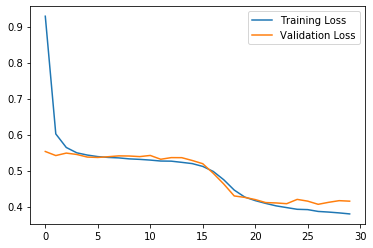

In [72]:
h_layer1= 110
h_layer2 = 100
h_layer3 = 80
h_layer4 = 50
h_layer5 = 40
h_layer6 = 25
h_layer7 = 15
h_layer8 = 5
n_out = 2
input_layer = tf.keras.layers.Input(shape=(16,))
layer = tf.keras.layers.Dense(h_layer1, activation="relu")(input_layer)
dropout=tf.keras.layers.Dropout(0.5)(layer)
layer = tf.keras.layers.Dense(h_layer2, activation="relu")(dropout)
dropout=tf.keras.layers.Dropout(0.3)(layer)
layer = tf.keras.layers.Dense(h_layer3, activation="relu")(dropout)
layer = tf.keras.layers.Dense(h_layer4, activation="relu")(layer)
dropout=tf.keras.layers.Dropout(0.5)(layer)
layer = tf.keras.layers.Dense(h_layer5, activation="relu")(dropout)
layer = tf.keras.layers.Dense(h_layer6, activation="relu")(layer)
layer = tf.keras.layers.Dense(h_layer7, activation="relu")(layer)
layer = tf.keras.layers.Dense(h_layer8, activation="relu")(layer)
output = tf.keras.layers.Dense(n_out, activation="softmax")(layer)
model_l3 = tf.keras.models.Model(input_layer, output)

optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model_l3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
hist=model_l3.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test), verbose=0)
print("Training Accuracy %.2f%% and Validation Accuracy %.2f%%"%(hist.history['accuracy'][-1]*100, hist.history['val_accuracy'][-1]*100))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(["Training Loss", "Validation Loss"])

### Neural Network with  10 layers

In ten layered model, the hidden nodes are:  [400,360,330,300,280,256,128,64,32,16,8] 

W1206 17:43:17.078836  4712 nn_ops.py:4283] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W1206 17:43:17.306694  4712 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Training Accuracy 83.82% and Validation Accuracy 84.11%


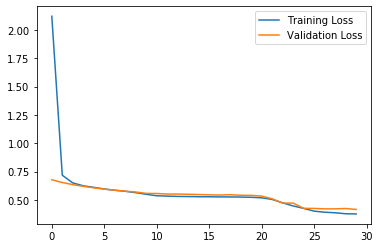

In [73]:
h_layer1=400
h_layer2=360
h_layer3= 330
h_layer4 = 300
h_layer5 = 256
h_layer6 = 128
h_layer7 = 64
h_layer8 = 32
h_layer9 = 16
h_layer10 = 8
n_out = 2
input_layer = tf.keras.layers.Input(shape=(16,))
layer = tf.keras.layers.Dense(h_layer1, activation="relu")(input_layer)
dropout=tf.keras.layers.Dropout(0.5)(layer)
layer = tf.keras.layers.Dense(h_layer2, activation="relu")(dropout)
layer = tf.keras.layers.Dense(h_layer3, activation="relu")(layer)
dropout=tf.keras.layers.Dropout(0.5)(layer)
layer = tf.keras.layers.Dense(h_layer4, activation="relu")(dropout)
dropout=tf.keras.layers.Dropout(0.6)(layer)
layer = tf.keras.layers.Dense(h_layer5, activation="relu")(dropout)
layer = tf.keras.layers.Dense(h_layer6, activation="relu")(layer)
dropout=tf.keras.layers.Dropout(0.3)(layer)
layer = tf.keras.layers.Dense(h_layer7, activation="relu")(dropout)
dropout=tf.keras.layers.Dropout(0.5)(layer)
layer = tf.keras.layers.Dense(h_layer7, activation="relu")(dropout)
layer = tf.keras.layers.Dense(h_layer9, activation="relu")(layer)
layer = tf.keras.layers.Dense(h_layer10, activation="relu")(layer)
output = tf.keras.layers.Dense(n_out, activation="softmax")(layer)
model_l5 = tf.keras.models.Model(input_layer, output)

optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model_l5.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
hist=model_l5.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test), verbose=0)
print("Training Accuracy %.2f%% and Validation Accuracy %.2f%%"%(hist.history['accuracy'][-1]*100, hist.history['val_accuracy'][-1]*100))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(["Training Loss", "Validation Loss"])

### Explanation of code for each network

I have considered using 16 useful features to train the model for this assignment. The number of output layers are set to 2 because its a binary classification data. There are only two values in "RainTomorrow" column, and those are "yes" or "no". The output of the first hidden layer is fed as input to the next hidden layer which consists of 256 nodes and the activation function. There is a dropout layer after the 2nd hidden layer. The optimizer I used here is Adam. The losses are "sparse categorical crossentropy" to determine how well the model performs during training. he evaluation metrics is "Accuracy" used to monitor the training and testing steps. 

# IV - Results

The plots are already plotted above. The graphs shows how the losses of the model are reduced. <br>
We can see from the models trained above that the model with ten hidden layers fits the data prefectly with the highest training and testing acuuracy of 83.82% and 84.11%. On the other hand, the model with 8 layers gives good training accuracy of 84.50% but has less validation accuracy.<br>

Hence, I will prefer model with 10 hidden layers to train this data.

# Conclusions

I have learned to create deep learning model and learned to find the correct number of hidden layers to maximize the accuracy of model. Apart from this, I learned to use various libraries especially designed for machine learning such as tensorflow and keras.

## Grading

Only well-written notebook will be graded. Please follow the structure and fill in as the other assignments. 

extra credit points | description
--|:--
1 | First structure (implementation, explanation, plot results, discussion of results)
1 | Second structure (implementation, explanation, plot results, discussion of results)
1 | Third structure (implementation, explanation, plot results, discussion of results)
1 | Explaining and discussing the reason for the selection (Any relation to your data?)
  | Comparing the results, discuss or verify your choice 

#### Optional Extra Credits

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 
- [OPT 2] Implement one of neural networks in the chart above and apply it to some real data. 